<div style='background-image: "intro_pic.png" ; padding: 0px ; background-size: cover ; border-radius: 5px ; height: 250px'>
    <div style="float: center ; margin: 50px ; padding: 30px ; background: rgba(255 , 255 , 255 , 0.7) ; width: 50% ; height: 150px">
        <div style="position: left ; top: 50% ; transform: translatey(-50%)">
            <div style="font-size: x-large ; font-weight: 600 ; color: rgba(0 , 0 ,10 , 0.6) ; line-height: 70%">Department of Civil Engineering</div>
            <div style="font-size: x-large ; font-weight: 900 ; color: rgba(200 , 0 , 0 , 0.8) ; line-height: 200%">EQE 582 Introduction to Seismology</div>
            <div style="font-size: -large ; font-weight: 1000 ; color: rgba(0 , 128, 128 , 0.9) ; line-height: 300%">>>>>Strong Ground Motion Analysis<<<<<  Assignment_3  Student ID: 195023012028  Date: 2020.12.29 </div>
   

### 1. Downloading acceleration waveform data of the selected earthquake for 3 stations in 3 components.

3 Trace(s) in Stream:
TK.0905..E | 2020-10-30T11:51:24.000000Z - 2020-10-30T11:52:23.660000Z | 100.0 Hz, 5967 samples
TK.0905..N | 2020-10-30T11:51:24.000000Z - 2020-10-30T11:52:23.660000Z | 100.0 Hz, 5967 samples
TK.0905..Z | 2020-10-30T11:51:24.000000Z - 2020-10-30T11:52:23.660000Z | 100.0 Hz, 5967 samples
3 Trace(s) in Stream:
TK.3513..E | 2020-10-30T11:51:24.000000Z - 2020-10-30T11:53:08.990000Z | 100.0 Hz, 10500 samples
TK.3513..N | 2020-10-30T11:51:24.000000Z - 2020-10-30T11:53:08.990000Z | 100.0 Hz, 10500 samples
TK.3513..Z | 2020-10-30T11:51:24.000000Z - 2020-10-30T11:53:08.990000Z | 100.0 Hz, 10500 samples
3 Trace(s) in Stream:
TK.3514..E | 2020-10-30T11:51:24.000000Z - 2020-10-30T11:53:08.990000Z | 100.0 Hz, 10500 samples
TK.3514..N | 2020-10-30T11:51:24.000000Z - 2020-10-30T11:53:08.990000Z | 100.0 Hz, 10500 samples
TK.3514..Z | 2020-10-30T11:51:24.000000Z - 2020-10-30T11:53:08.990000Z | 100.0 Hz, 10500 samples


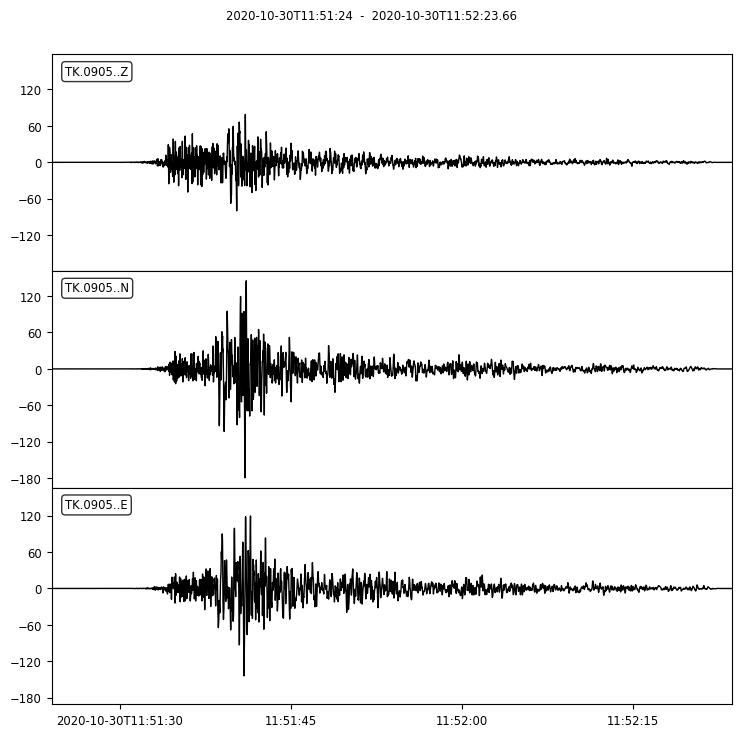

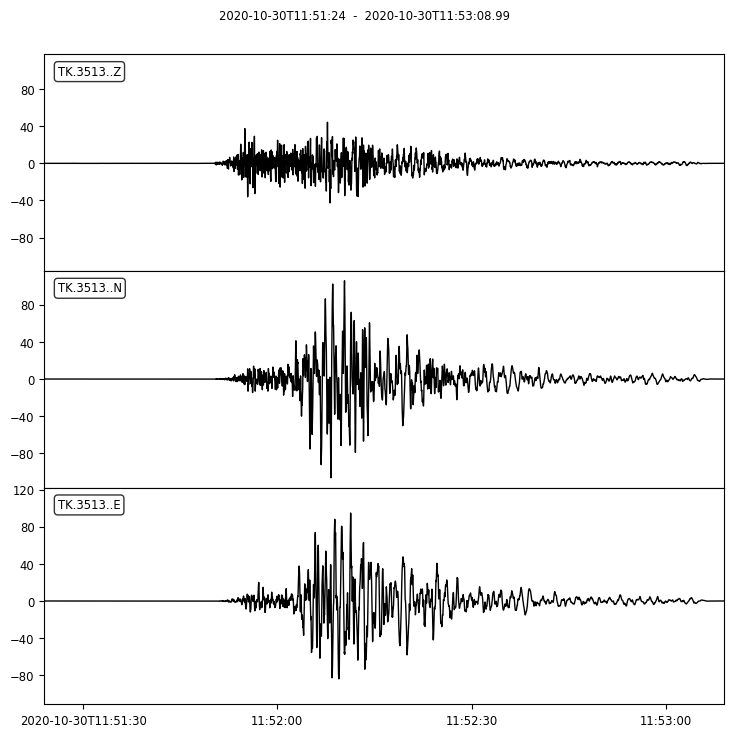

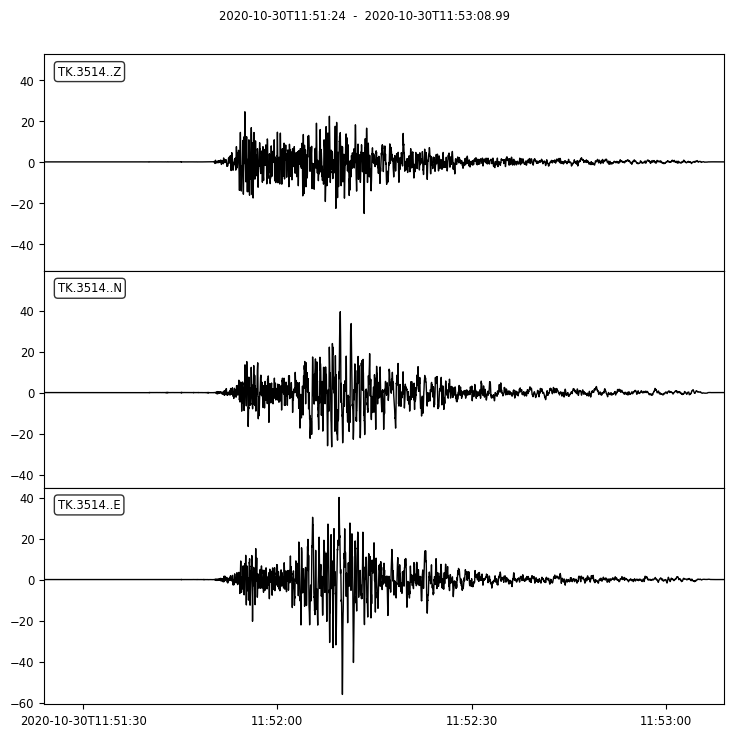

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import obspy
from obspy import Stream
import matplotlib.pyplot as plt
import scipy
# Read wavform data in MiniSeed format
st = obspy.read("20201030115124_0905.mseed")    #Kusadası Station(Vs30= 369 m/s)
st1 = obspy.read("20201030115124_3513.mseed")  #Bayraklı_1 Station(Vs30=196 m/s)
st2 = obspy.read("20201030115124_3514.mseed")  #Bayraklı_2 Station(Vs30=862 m/s)
print(st)
print(st1)
print(st2)

#--------------------------------------------------------

fig = st.plot()
fig = st1.plot()
fig = st2.plot()

### 2. Selected the Station with a Clear Trace.(3513-EW)


In [2]:
st = obspy.read("20201030115124_3513.mseed")
tr = st[0]  #  selected the station with a clear trace.

print(tr.stats)


         network: TK
         station: 3513
        location: 
         channel: E
       starttime: 2020-10-30T11:51:24.000000Z
         endtime: 2020-10-30T11:53:08.990000Z
   sampling_rate: 100.0
           delta: 0.01
            npts: 10500
           calib: 1.0
         _format: MSEED
           mseed: AttribDict({'dataquality': 'D', 'number_of_records': 21, 'encoding': 'FLOAT64', 'byteorder': '>', 'record_length': 4096, 'filesize': 258048})


MSEED | 2020-10-30T11:53:08.990000Z | 3513


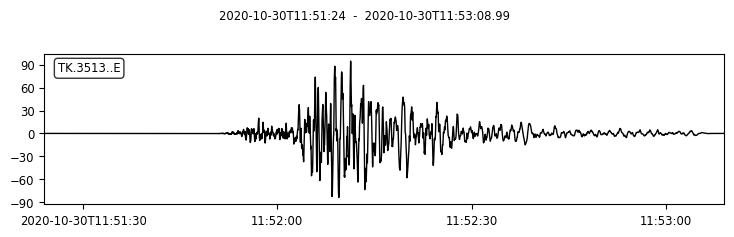

In [3]:
print(tr.stats._format, "|", tr.stats.endtime, "|", tr.stats.station)

fig = tr.plot()

### 3. Reading "Starttime" and "Endtime" and cutting Data by Used Starttime and Endtime.

In [4]:
tr.resample(sampling_rate=100.0)
print(tr)

TK.3513..E | 2020-10-30T11:51:24.000000Z - 2020-10-30T11:53:08.990000Z | 100.0 Hz, 10500 samples


In [5]:
tr.trim(tr.stats.starttime + 33, tr.stats.starttime + 70)

print(tr.stats.starttime, "|", tr.stats.endtime)

2020-10-30T11:51:57.000000Z | 2020-10-30T11:52:34.000000Z


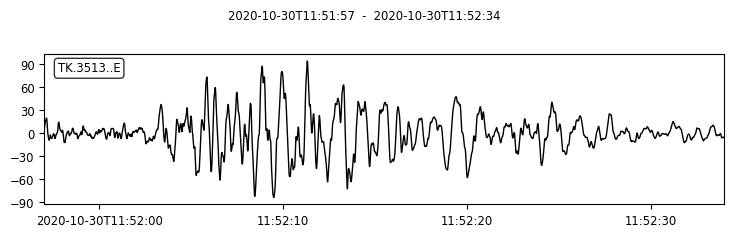

In [6]:
fig = tr.plot()

### 4. Bandpass Filtering for Trimmed Trace

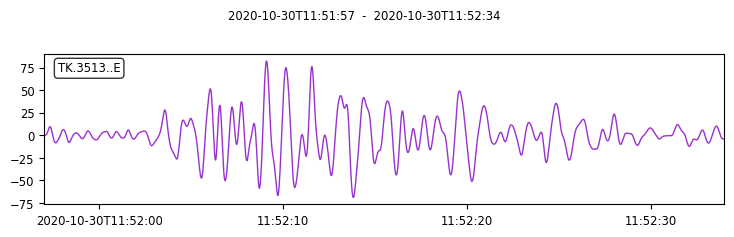

In [7]:
trbp = tr.detrend("linear")
trbp = trbp.filter("bandpass", freqmin=0.05, freqmax=2.0)

fig = trbp.plot(color='darkorchid')

### 5. Reading PGA Valuee and Printing

In [8]:
print(max(tr.data ,key = abs ))

print(min(tr.data ,key = abs ))

82.3808751656
5.4088580085e-05


### 6. Plotting he Fourier Amplitude Spectrum

In [9]:
Fn = 1 / (2 * trbp.stats.delta)            # Nyquist frequency
Delta_F = 1 / trbp.stats.sampling_rate

print("Fmax :", Fn, " ///     Fmin :", Delta_F)

Fmax : 50.0  ///     Fmin : 0.01


In [10]:
from scipy import fftpack

trbp=tr
frq_range = np.arange(0.01, 50, 0.01)

In [11]:
trbp.stats.npts

3701

In [12]:
sig_fft = fftpack.fft(trbp)

amp =np.abs(sig_fft)

power = amp**2
angle = np.angle(sig_fft)

sample_freq = fftpack.fftfreq(trbp.stats.npts, Delta_F)            #  window size , sample spacing    4967, 0.01

#print(amp)
#print(sample_freq)

amp_freq = np.array([amp , sample_freq])

amp_position = [amp_freq[0,:].argmax()]
peak_freq = amp_freq[1, amp_position]

print(amp_position)
print(peak_freq)

[28]
[ 0.75655228]


In [13]:
sample_freq = sample_freq[0:]
amp = amp[0:]
sample_freq

array([ 0.        ,  0.02701972,  0.05403945, ..., -0.08105917,
       -0.05403945, -0.02701972])

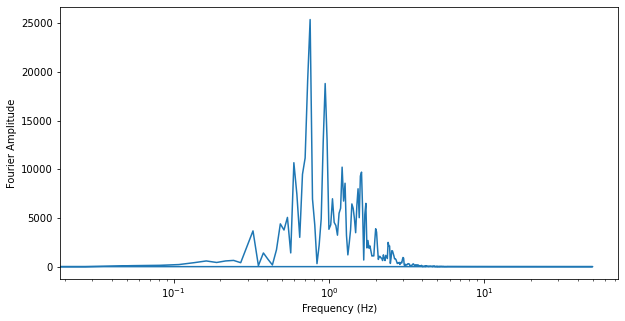

In [14]:
plt.figure(figsize=(10, 5)) 
plt.plot(sample_freq, amp)

#plt.xlim([0, 5])
plt.xscale("log")

plt.xlabel("Frequency (Hz)")
plt.ylabel("Fourier Amplitude")

plt.show()

### 7. Fourier Amplitude from SeismoSignal for 3513_EW

  <<<<<<<<<< 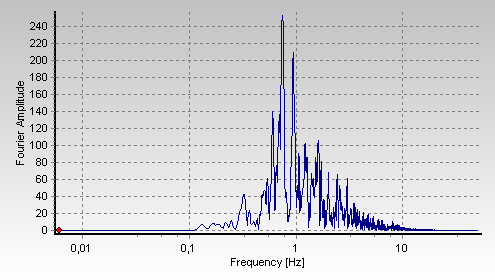>>>>>>>>>>